# SPRINT CHALLENGE

#Linear Algebra

In [1]:
#lets import the basic libraries we will need
from __future__ import print_function, division
import numpy as np
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline



## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

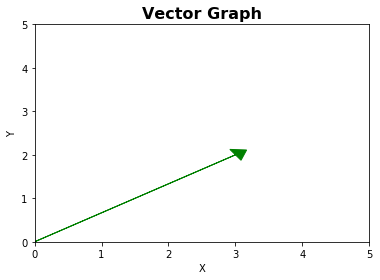

In [133]:
#pasing the vector as numpy array
vector_a = np.array([3, 2])
#print(vector_a)

#plot the vector
plt.arrow(0,0,3, 2, head_width=.3, head_length=0.2, color = 'g')
plt.xlim(0,5)          
plt.ylim(0,5)
plt.title("Vector Graph", fontsize = 16, fontweight = "bold")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [11]:
#vector as numpy array
b = np.array([17, -4 , -2, 1])

#norm of the vector using np.norm
b_norm = np.linalg.norm(b)
print(b_norm)

17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [12]:
#vectors as np array
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4 , 6])

#for dot product, use np.dot
c_dot_d = np.dot(c,d)
print(c_dot_d)

42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [14]:
#create the matrix using np.matrix
E = np.matrix([[7, 4, 2],[1, 3, -1], [2, 6, -4]])

#get the inverse of the matrix using np.linalg.inverse
inverse_E = np.linalg.inv(E)
in

matrix([[ 0.17647059, -0.82352941,  0.29411765],
        [-0.05882353,  0.94117647, -0.26470588],
        [ 0.        ,  1.        , -0.5       ]])

In [16]:
#tranpose of the matrix
#usematrix.transpose
E_transpose = E.transpose()
print(E_transpose)

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [73]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [18]:
#mean of the customer column 
df.customers.mean()

1135.7142857142858

In [19]:
#standard deviation of the customer column
df.customers.std()

314.26406851866597

In [20]:
#variance of the customer column
df.customers.var()

98761.90476190478

In [21]:
#mean of the snow column
df.snow.mean()

2.7142857142857144

In [22]:
#standard deviation of the snow column
df.snow.std()

2.9277002188455996

In [23]:
#variance of the snow column
df.snow.var()

8.571428571428571

In [25]:
#summary statistics of the dataframe
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [26]:
#variance of the whole dataframe
df.var()

customers    98761.904762
snow             8.571429
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

Numerically these two variances are not comparable because these variances are not dependent on each other. The variance in snow is only related to how much snow fell in the week. To compare the variances, we might want to look into var-covar matrix which can explain if there is any relationship. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [74]:
#varaince-covariance matrix of customers and inches of snow 
#covariance is just a correlation measured in the units of the original variables
#shows strong covariance
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [76]:
#I'm curious to see what their correlation looks like
#More people when there is more snow:
#shows strong positive correlation
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [85]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [86]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [79]:
#check the shape to know the dimension of the dataframe
df.shape

(4, 18)

In [87]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 105  245  685  147  193  156  720  253  488  198  360 1102 1472   57
  1374  375   54]
 [ 103  227  803  160  235  175  874  265  570  203  365 1137 1582   73
  1256  475   64]
 [ 103  242  750  122  184  147  566  171  418  220  337  957 1462   53
  1572  458   62]
 [  66  267  586   93  209  139 1033  143  355  187  334  674 1494   47
  1506  135   41]]


In [88]:
#let's import the sklean library
from sklearn.preprocessing import StandardScaler

#we will standarize our array 
x_Std = StandardScaler().fit_transform(numpy_X)

/home/mishraka/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mishraka/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [89]:
#check our new array x_Std
x_Std

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

### Let's check that mean is 0 and standard Deviation is 1

In [90]:
#check if the mean is zero
x_Std.mean()

3.2653618371328133e-18

In [91]:
#check that Standard Dev is 1
x_Std.std()

1.0

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [92]:
#import PCA
from sklearn.decomposition import PCA

#We will keep the dimesion to 2
pca = PCA(n_components=2)

#perform PCA on our array
principal_Components = pca.fit_transform(x_Std)

#let's create a dataframe of out PCA 1 and 2
principal_Df = pd.DataFrame(data = principal_Components
             , columns = ['principal component 1', 'principal component 2'])

In [93]:
#let's add the Country column to our dataframe
final_Df = pd.concat([principal_Df, df[['Country']]], axis = 1)

In [94]:
final_Df

,principal component 1,principal component 2,Country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


In [95]:
#the shape of our final dataframe
final_Df.shape

(4, 3)

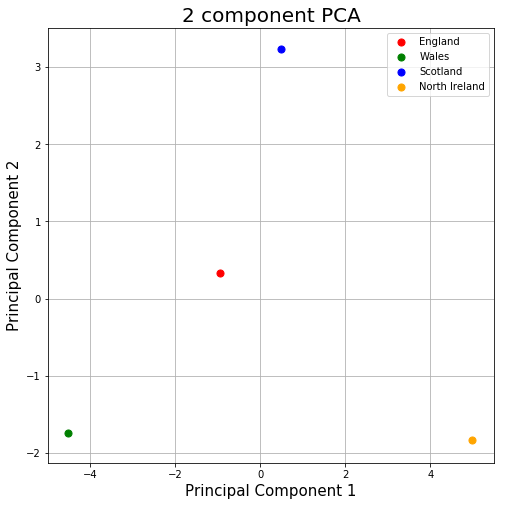

In [96]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['England', 'Wales', 'Scotland', "North Ireland"]
colors = ['r', 'g', 'b', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = final_Df['Country'] == target
    ax.scatter(final_Df.loc[indicesToKeep, 'principal component 1']
               , final_Df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
   # print(indicesToKeep)
ax.legend(targets)
ax.grid()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

### ANSWER
It's important to know how many clusters there might be. Below is how we are calculating the right number of clusters for this dataset

In this case, 4 seems like the right number of clusters. After 4, the slope flattens and if we try to make more clusters, we are forcing more clusters when there can't be anymore. 

In [110]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [111]:
points.shape

(200, 2)

In [112]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

[[ -7.84680264  -3.42127666]
 [ -3.55432332  -6.88472945]
 [ -0.19282234  -9.67103016]
 [ -6.40145554  -5.22397192]
 [ -0.8040258   -9.70445652]
 [ -4.9771936   -6.13883603]
 [ -8.11899027  -3.62410932]
 [ -8.1456292   -2.78795056]
 [ -3.56865911   5.40178102]
 [ -5.71170922  -6.80201318]
 [ -4.00606304  -7.99484628]
 [ -4.34701906  -7.07327411]
 [  0.02288488 -10.57220028]
 [ -4.65338805  -8.10057054]
 [ -8.26306683  -4.36478167]
 [ -1.78925444 -11.0957949 ]
 [ -7.56683375  -4.39166363]
 [ -3.00212691  -5.73856732]
 [ -2.57673872  -7.83223833]
 [  6.74057358   4.13730878]
 [ -7.96610489  -3.14997573]
 [  6.26556835   5.01331613]
 [  6.28517859   4.44708732]
 [  6.40527985   4.38379283]
 [ -2.68559499  -8.51265544]
 [ -5.28302702  -9.34170965]
 [  0.07097306 -10.11371322]
 [ -1.64051597   4.00264149]
 [ -4.60671171  -8.36655774]
 [ -4.6838594   -7.26710703]
 [ -3.16629032  -7.64623711]
 [ -2.56850303  -7.13484226]
 [ -0.09036863  -7.64228289]
 [  6.8415471    2.62542108]
 [ -6.41252467

In [113]:
#import KMeans from sklearn
from sklearn.cluster import KMeans 
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(numpy_points)
    sum_of_squared_distances.append(km.inertia_)

#### It's important to know how many clusters there might be. Below is how we are calculating the right number of clusters for this dataset

In this case, 4 seems like the right number of clusters. After 4, the slope flattens and if we try to make more clusters, we are forcing more clusters when there can't be anymore. 

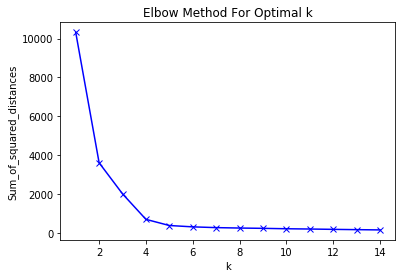

In [114]:
#plot it to see where is the kink
#we will plot the clusters based on where the graph flattens/ or the slope becomes zero
#becuase only those many clusters make sense

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## plotting the clusters before performing PCA

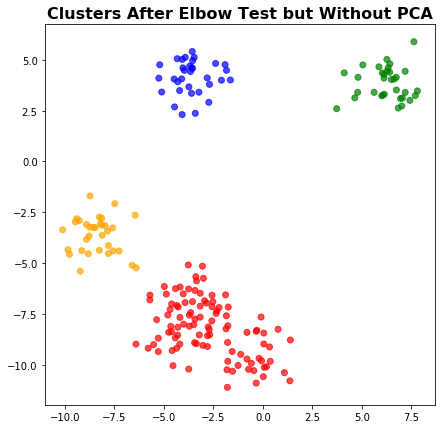

In [115]:
#Let's first do clustering without standarizing the data (No PCA)


from sklearn.cluster import KMeans 
#set a 3 Kmeans clustering
kmeans = KMeans(n_clusters = 4)

#computer cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(numpy_points)

#define the color map
color_map_label = {0: 'b', 1: 'r', 2: 'g', 3: "orange"}
label_color = [color_map_label[i] for i in X_clustered]

#lets plot the scatter plot
plt.figure(figsize= (7,7))
plt.scatter(numpy_points[:,0], numpy_points[:,1], c = label_color, alpha=0.7)
plt.title('Clusters After Elbow Test but Without PCA', fontsize = 16, fontweight = "bold")
plt.show()

## Clustering after PCA (Standarizing the data first with PCA)

In [ ]:
#Lets try it with PCA now

In [116]:
#We will standarize our data first
from sklearn.preprocessing import StandardScaler
X_Std = StandardScaler().fit_transform(numpy_points)

In [117]:
x_Std.mean()

3.2653618371328133e-18

In [118]:
x_Std.std()

1.0

In [119]:
#PCA transforamtion
pca = PCA(n_components=2)
x_2d = pca.fit_transform(X_Std)


In [127]:
# Principal Component Analysis module
from sklearn.decomposition import PCA 
# KMeans clustering 
from sklearn.cluster import KMeans  

# Python defacto plotting library
import matplotlib.pyplot as plt 
%matplotlib inline
# More snazzy plotting library
import seaborn as sns
 

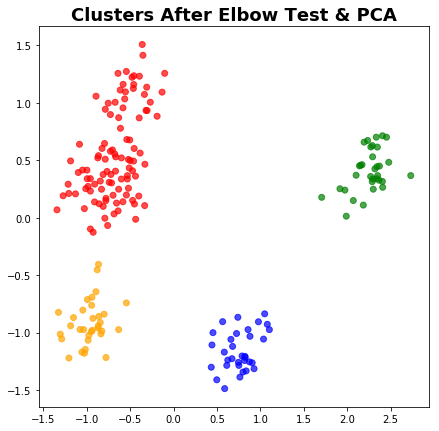

In [137]:

from sklearn.cluster import KMeans 
#set a 3 Kmeans clustering
kmeans = KMeans(n_clusters = 4)

#computer cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_2d)

#define the color map
color_map_label = {0: 'b', 1: 'r', 2: 'g', 3: 'orange'}
label_color = [color_map_label[i] for i in X_clustered]

#lets plot the scatter plot
ax = plt.figure(figsize= (7,7))

plt.scatter(x_2d[:,0], x_2d[:,1], c = label_color, alpha=0.7)
plt.title("Clusters After Elbow Test & PCA", fontsize = 18, fontweight = "bold")
plt.show()